In [159]:
# Load relevant packages:
import numpy as np
from scipy import sparse
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns

#sklearn packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

from IPython.display import display

In [160]:
#Text Formats
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [161]:
#Load the dataset
data = pd.read_csv(r'C:\Users\Stephenson\Desktop\Coding\Machine Learning and Data Mining\Final Assessment\data\diabetes.csv')
#Looking at the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [162]:
#List of variables that will be used in this dataset
print(color.BOLD+"List of Variables"+color.END+": {}".format(data.columns))
print(color.BOLD+"\nNumber of Predictor Variables"+color.END+": {}".format(len(data.columns)-1))

List of Variables: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Number of Predictor Variables: 8


In [163]:
#Number of Observations
print(color.BOLD+"Number of Observations"+color.END+": {}".format(len(data.index)))

Number of Observations: 768


##################################################Data Dictionary###############################################################
#Continuous Variables#
Pregnancies: number of pregnancies the individuals had prior to the collection of data (number from 0 onwards) 
Glucose: glucose level of the patient after two hours of ingestion of carbohydrate (mg/dL)
Blood Pressure:blood pressure of the patient (mmHg)
SkinThickness: skin fold thickness (mm)
Insulin: insulin level measured after two hours of ingestion of carbohydrate
BMI: Body Mass Index (weight of patient divided by height of patient)
DiabetesPedigreeFunction:a function which scores likelihood of diabetes based on family history
Age: age in years (cohort taken above 20 years)

#Categorical Variables#
Outcome: Whether the patient has diabetes mellitus within 5 years (0 means no, 1 means yes)

####################################################Data Exploration############################################################

In [164]:
#Initial EDA
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [165]:
#Splitting the data set to outcomes and factors for EDA
data.fact = data.iloc[:,0:8]
data.out = data.iloc[:,8]
#Double Check
print(color.BOLD+color.UNDERLINE+"Factor dataset\n"+color.END)
print(data.fact)
print(color.BOLD+color.UNDERLINE+"\nOutcome Dataset\n"+color.END)
data.out.head()

Factor dataset

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12            10      

C:\Users\Stephenson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\Stephenson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

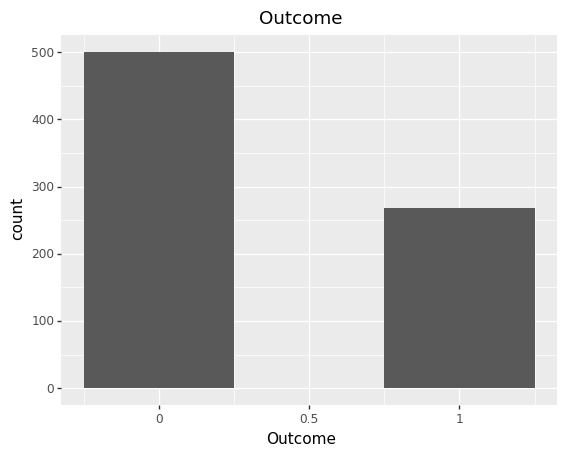

<ggplot: (-9223372036161873250)>


In [166]:
#Visualise the dataset
p = ggplot(aes(x="Outcome"), data=data)+geom_bar(width=0.5)+ggtitle("Outcome")
print(p)

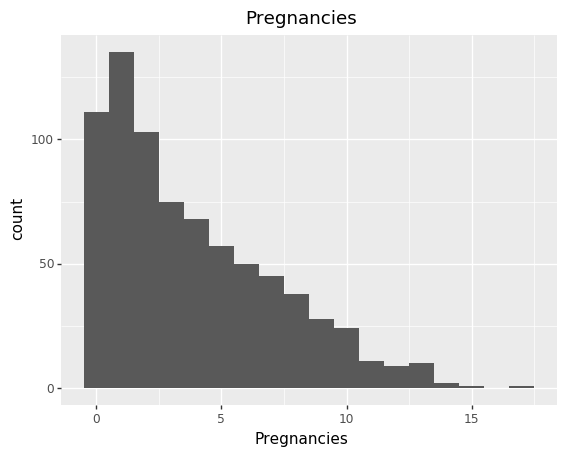

<ggplot: (692905725)>


In [167]:
#Pregnancies
p = ggplot(aes(x='Pregnancies'), data=data)+geom_histogram(binwidth=1)+ggtitle("Pregnancies") 
print(p)

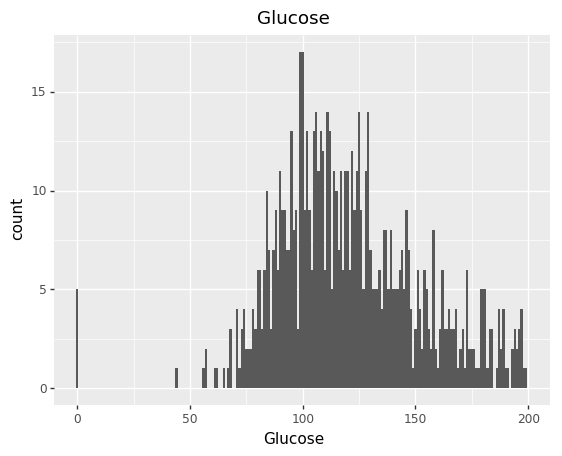

<ggplot: (-9223372036161755802)>


In [168]:
#Glucose
p = ggplot(aes(x='Glucose'), data=data)+geom_histogram(binwidth=1)+ggtitle("Glucose")
print(p)

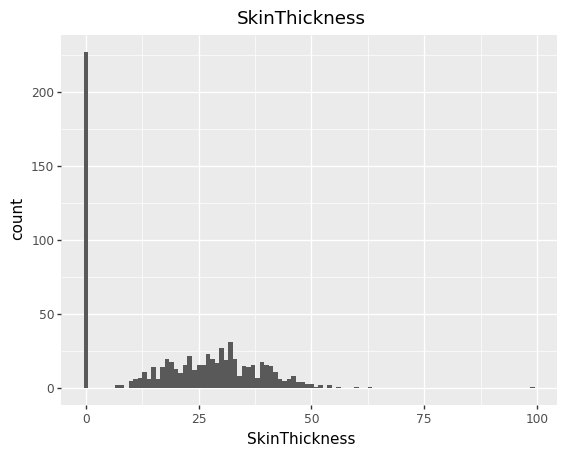

<ggplot: (-9223372036161755732)>


In [169]:
#Skin Thickness
p = ggplot(aes(x='SkinThickness'), data=data)+geom_histogram(binwidth=1)+ggtitle("SkinThickness") 
print(p)

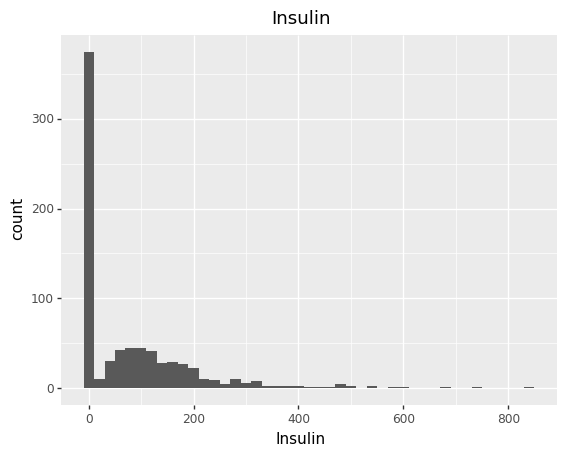

<ggplot: (-9223372036161799918)>


In [170]:
#Insulin
p = ggplot(aes(x='Insulin'), data=data)+geom_histogram(binwidth=20)+ggtitle("Insulin") 
print(p)

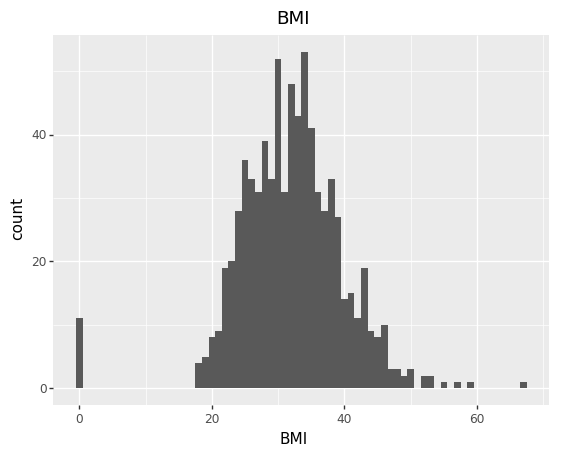

<ggplot: (-9223372036161720460)>


In [171]:
#BMI
p = ggplot(aes(x='BMI'), data=data)+geom_histogram(binwidth=1)+ggtitle("BMI")
print(p)

C:\Users\Stephenson\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 29'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


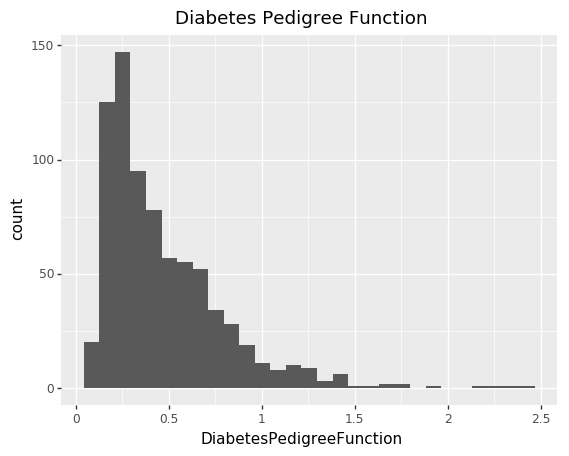

<ggplot: (-9223372036161800409)>


In [172]:
#DiabetesPedigreeFunction
p = ggplot(aes(x='DiabetesPedigreeFunction'), data=data)+geom_histogram()+ggtitle("Diabetes Pedigree Function")
print(p)

C:\Users\Stephenson\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 17'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


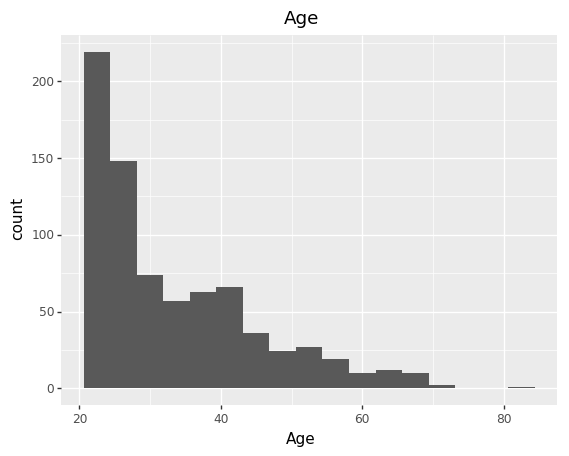

<ggplot: (693047879)>


In [173]:
#Age
p = ggplot(aes(x='Age'), data=data)+geom_histogram()+ggtitle("Age")
print(p)

In [174]:
#Check for Nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Looking at the outcome variable, we can see that there is a larger number of 0 samples (no diabetes) than 1 samples which is intuitive. However, this indicates a need to balance out the class weights when fitting a regression to ensure the model does not categorise all future predictions as 0. 

From the Variable frequency distributions, we can see that there are some variables that have a suspiciously large number of spikes at values of 0 (despite the variables being supposedly non-null integers/floats). These variables are Insulin, Gluscose, Skin Thickness and BMI. This indicates a problem with data integrity or the data collection process as it is not plausible to have a BMI value of 0, hence the datapoints may be removed (or the variable) depending on the number of datapoints that have 0 for these variables.

In [175]:
#Checking for NA entries
data.isnull().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no NA values in the dataset.

Correlation Matrix
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose               

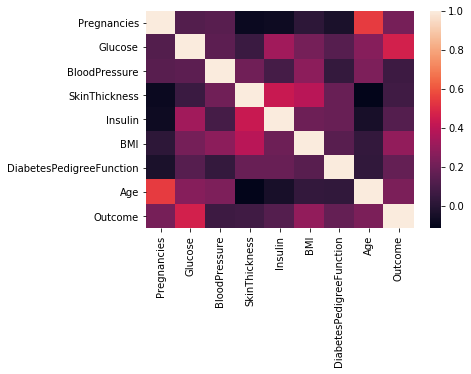

In [176]:
#Correlation Plot
corr = data.corr()
print(color.BOLD+color.UNDERLINE+"Correlation Matrix"+color.END)
print(corr)
print(color.BOLD+color.UNDERLINE+"\nVisual Correlation Heat Map\n"+color.END)
print(sns.heatmap(corr))

We can see that there isn't that much correlation between the variables.

Text(0, 0.5, 'Average Age')

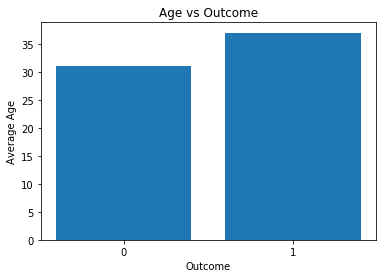

In [177]:
#Univariate Analysis
#For Age
#Calculating mean of age for each outcome
age_outcome0 = data.loc[data.Outcome==0, 'Age'].mean() 
age_outcome1 = data.loc[data.Outcome==1, 'Age'].mean() 
age_outcome = [age_outcome0, age_outcome1]

#Plotting
plt.bar(['0','1'], age_outcome)
plt.title("Age vs Outcome")
plt.xlabel('Outcome')
plt.ylabel('Average Age')

Text(0, 0.5, 'Average Pregnancies')

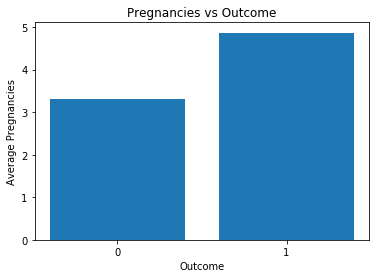

In [178]:
#For Pregnancies
#Calculating mean of Pregnancies for each outcome
preg_outcome0 = data.loc[data.Outcome==0, 'Pregnancies'].mean() 
preg_outcome1 = data.loc[data.Outcome==1, 'Pregnancies'].mean() 
preg_outcome = [preg_outcome0, preg_outcome1]

#Plotting
plt.bar(['0','1'], preg_outcome)
plt.title("Pregnancies vs Outcome")
plt.xlabel('Outcome')
plt.ylabel('Average Pregnancies')

Text(0, 0.5, 'Average Blood Pressure')

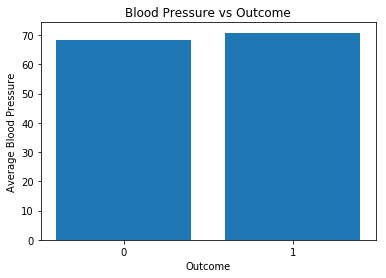

In [179]:
#For Blood Pressure
#Calculating mean of Blood Pressure for each outcome
BP_outcome0 = data.loc[data.Outcome==0, 'BloodPressure'].mean() 
BP_outcome1 = data.loc[data.Outcome==1, 'BloodPressure'].mean() 
BP_outcome = [BP_outcome0, BP_outcome1]

#Plotting
plt.bar(['0','1'], BP_outcome)
plt.title("Blood Pressure vs Outcome")
plt.xlabel('Outcome')
plt.ylabel('Average Blood Pressure')

Text(0, 0.5, 'Average Diabetes Pedigree Function')

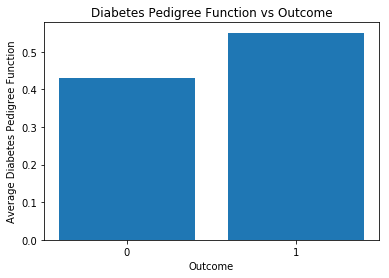

In [180]:
#For Diabetes Pedigree Function
#Calculating mean of Diabetes Pedigree Function for each outcome
DPF_outcome0 = data.loc[data.Outcome==0, 'DiabetesPedigreeFunction'].mean() 
DPF_outcome1 = data.loc[data.Outcome==1, 'DiabetesPedigreeFunction'].mean() 
DPF_outcome = [DPF_outcome0, DPF_outcome1]

#Plotting
plt.bar(['0','1'], DPF_outcome)
plt.title("Diabetes Pedigree Function vs Outcome")
plt.xlabel('Outcome')
plt.ylabel('Average Diabetes Pedigree Function')

Text(0, 0.5, 'Average Glucose')

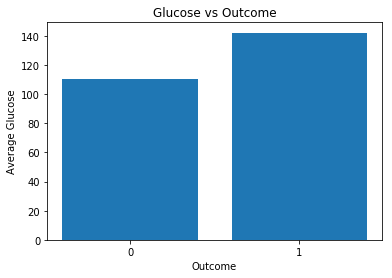

In [181]:
#For Glucose
#Calculating mean of Glucose for each outcome
Glu_outcome0 = data.loc[(data.Outcome==0)&(data.Glucose!=0), 'Glucose'].mean() 
Glu_outcome1 = data.loc[(data.Outcome==1)&(data.Glucose!=0), 'Glucose'].mean() 
Glu_outcome = [Glu_outcome0, Glu_outcome1]

#Plotting
plt.bar(['0','1'], Glu_outcome)
plt.title("Glucose vs Outcome")
plt.xlabel('Outcome')
plt.ylabel('Average Glucose')

Text(0, 0.5, 'Average BMI')

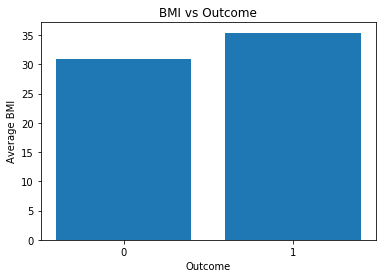

In [182]:
#For BMI
#Calculating mean of BMI for each outcome
BMI_outcome0 = data.loc[(data.Outcome==0) & (data.BMI!=0), 'BMI'].mean() 
BMI_outcome1 = data.loc[(data.Outcome==1) & (data.BMI!=0), 'BMI'].mean() 
BMI_outcome = [BMI_outcome0, BMI_outcome1]

#Plotting
plt.bar(['0','1'], BMI_outcome)
plt.title("BMI vs Outcome")
plt.xlabel('Outcome')
plt.ylabel('Average BMI')

Text(0, 0.5, 'Average Insulin')

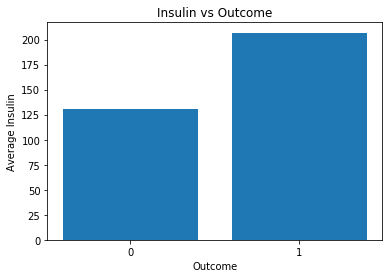

In [183]:
#For Insulin
#Calculating mean of Insulin for each outcome
Ins_outcome0 = data.loc[(data.Outcome==0) & (data.Insulin!=0), 'Insulin'].mean() 
Ins_outcome1 = data.loc[(data.Outcome==1) & (data.Insulin!=0), 'Insulin'].mean() 
Ins_outcome = [Ins_outcome0, Ins_outcome1]

#Plotting
plt.bar(['0','1'], Ins_outcome)
plt.title("Insulin vs Outcome")
plt.xlabel('Outcome')
plt.ylabel('Average Insulin')

Text(0, 0.5, 'Average Skin Thickness')

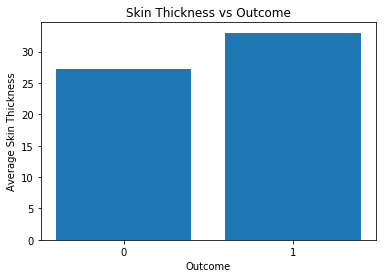

In [184]:
#For Skin Thickness
#Calculating mean of Skin Thickness for each outcome
Skin_outcome0 = data.loc[(data.Outcome==0) & (data.SkinThickness!=0), 'SkinThickness'].mean() 
Skin_outcome1 = data.loc[(data.Outcome==1) & (data.SkinThickness!=0), 'SkinThickness'].mean() 
Skin_outcome = [Skin_outcome0, Skin_outcome1]

#Plotting
plt.bar(['0','1'], Skin_outcome)
plt.title("Skin Thickness vs Outcome")
plt.xlabel('Outcome')
plt.ylabel('Average Skin Thickness')

Based on the average value of the predictors for each scenario of outcome we can see that most of the variables seem to have an effect on the outcome. Blood Pressure seems to have the smallest effect based on the visualisations and Insulin the biggest. 

In [185]:
#Inspecting suspicious data
print(color.BOLD+color.UNDERLINE+"% of Null Entries"+color.END)

print(color.BOLD+"\nGlucose"+color.END+": {:.2f}".format((data[data.Glucose==0].shape[0]/data.shape[0])*100))

print(color.BOLD+"\nInsulin"+color.END+": {:.2f}".format((data[data.Insulin==0].shape[0]/data.shape[0])*100))

print(color.BOLD+"\nSkinThickness"+color.END+": {:.2f}".format((data[data.SkinThickness==0].shape[0]/data.shape[0])*100))

print(color.BOLD+"\nBMI"+color.END+": {:.2f}".format((data[data.BMI==0].shape[0]/data.shape[0])*100))

% of Null Entries

Glucose: 0.65

Insulin: 48.70

SkinThickness: 29.56

BMI: 1.43


We can see that there is a large amount of incorrect data for the Insulin variable with approximatly 49% of the dataset having null for insulin. This is followed by Skin Thickness with a percentage of 30%. 

To remediate this, we may think of either getting rid of the variable entirely (especially for insulin as nearly half of the dataset has this issue and remove these data points will cause an insufficient amount of data for our model training/testing). For the other smaller variables, we can deal with them using averaging techniques to approximate the value.

In [186]:
#Looking at Glucose
data.loc[data.Glucose==0, :]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


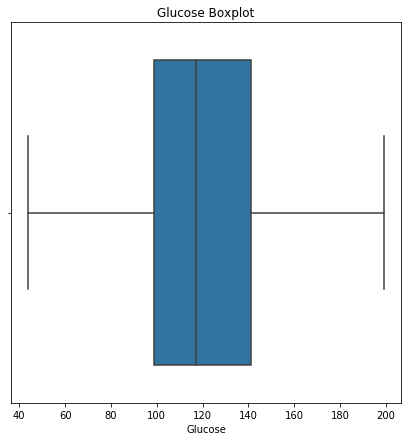

In [187]:
#Glucose Boxplot

plt.figure(figsize=(7,7,))

ax = sns.boxplot(x='Glucose', data=data[data.Glucose!=0])

plt.title("Glucose Boxplot")

plt.show()

In [188]:
#looking at Insulin
data.loc[data.Insulin==0, :].iloc[0:5, :]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0


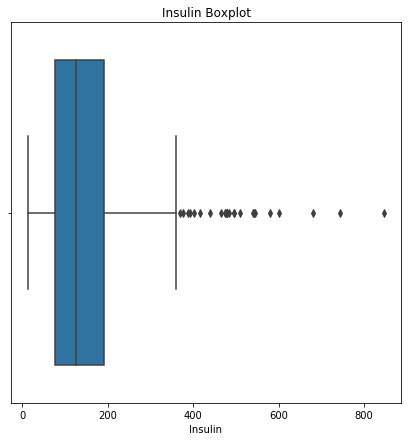

In [189]:
#Insulin Boxplot

plt.figure(figsize=(7,7,))

ax = sns.boxplot(x='Insulin', data=data[data.Insulin!=0])

plt.title("Insulin Boxplot")

plt.show()

In [190]:
#Looking at SkinThickness
data.loc[data.SkinThickness==0, :].iloc[0:5, :]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0


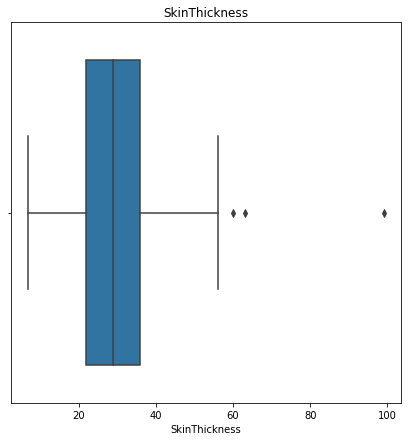

In [191]:
#SkinThickness Boxplot

plt.figure(figsize=(7,7,))

ax = sns.boxplot(x='SkinThickness', data=data[data.SkinThickness!=0])

plt.title("SkinThickness")

plt.show()

In [192]:
#Looking at BMI
data.loc[data.BMI==0, :].iloc[0:5, :]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0


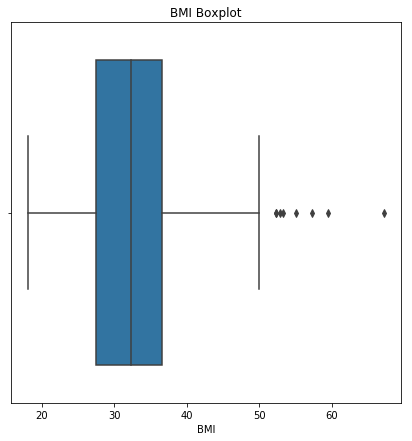

In [193]:
#BMI Boxplot

plt.figure(figsize=(7,7,))

ax = sns.boxplot(x='BMI', data=data[data.BMI!=0])

plt.title("BMI Boxplot")

plt.show()

From the boxplots above, we can see that there are a large number of outliers for the Insulin variable. Thus, a more robust approach would be to fill the null Insulin datapoints with the median of the Insulin values. For the rest of the variables, we will proceed with filling the null values with the mean.

######################################################Data Cleaning############################################################

In [194]:
#Calculating the mean of Glucose (excluding nulls)
Glucose_mean = data.loc[data.Glucose!=0, 'Glucose'].mean()
#Create a new column which replaces null values with the mean
data['new_Glucose'] = np.where(data.Glucose == 0, Glucose_mean, data.Glucose)

In [195]:
#Calculating the mean of BMI (excluding nulls)
BMI_mean = data.loc[data.BMI!=0, 'BMI'].mean()
#Create a new column which replaces null values with the mean
data['new_BMI'] = np.where(data.BMI == 0, BMI_mean, data.BMI)

In [196]:
#Calculating the mean of Skin Thickness (excluding nulls)
SkinThickness_mean = data.loc[data.SkinThickness!=0, 'SkinThickness'].mean()
#Create a new column which replaces null values with the mean
data['new_SkinThickness'] = np.where(data.SkinThickness == 0, SkinThickness_mean, data.SkinThickness)

In [197]:
#Calculating the median of Insulin
Insulin_median = data.loc[data.Insulin!=0, 'Insulin'].median()
#Create a new column which replaces null values with the median
data['new_Insulin'] = np.where(data.Insulin == 0, Insulin_median, data.Insulin)

In [198]:
#Sanity Check
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,new_Glucose,new_BMI,new_SkinThickness,new_Insulin
0,6,148,72,35,0,33.6,0.627,50,1,148.0,33.6,35.00000,125.0
1,1,85,66,29,0,26.6,0.351,31,0,85.0,26.6,29.00000,125.0
2,8,183,64,0,0,23.3,0.672,32,1,183.0,23.3,29.15342,125.0
3,1,89,66,23,94,28.1,0.167,21,0,89.0,28.1,23.00000,94.0
4,0,137,40,35,168,43.1,2.288,33,1,137.0,43.1,35.00000,168.0


In [199]:
#Make a new dataset with desirable variables
data_final = data.iloc[:, [0,2,6,7,8,9,10,11,12]]

In [200]:
#Sanity Check
data_final.head()

,Pregnancies,BloodPressure,DiabetesPedigreeFunction,Age,Outcome,new_Glucose,new_BMI,new_SkinThickness,new_Insulin
0,6,72,0.627,50,1,148.0,33.6,35.00000,125.0
1,1,66,0.351,31,0,85.0,26.6,29.00000,125.0
2,8,64,0.672,32,1,183.0,23.3,29.15342,125.0
3,1,66,0.167,21,0,89.0,28.1,23.00000,94.0
4,0,40,2.288,33,1,137.0,43.1,35.00000,168.0


In [201]:
#Prepare Datasets for Algorithm
#Seperate Final Dataset into variables and outcomes
X = data_final.drop(axis = 1, columns='Outcome')
y = data_final['Outcome']

#Split into training and test sets (stratify on y to ensure equal number of classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [202]:
#Sanity Check
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (614, 8)
y_train shape:  (614,)
X_test shape:  (154, 8)
y_test shape:  (154,)


In [203]:
#Load Packages for Scaling, Pipeline and GridsearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV

####################################################Linear Models###############################################################

For our linear model, logistic regression is used due to the nature of the output being categorical instead of continuous. Logistic regression is the ideal method for categorising data for linear regression algorithns.

In [204]:
#Logistic Regression Algorithm

#Setting up pipeline for GridsearchCV
#Scaling
Scaler = StandardScaler()
#Setting up a logistic Regression algorithm
Logreg = LogisticRegression()
#Pipeline
Pipe = Pipeline([('Transform', Scaler), ('Estimator', Logreg)])
#Define Parameter Grid for parameters of interest (C, Class weight & Penalty)
Param = {'Estimator__C': [20, 30, 40, 50],
            'Estimator__class_weight': [{0:0.4, 1:0.6}, {0:0.35, 1:0.65}, {0:0.3, 1:0.7}],
            'Estimator__penalty': ['l1', 'l2']}
#Initialise GridSearchCV with 5 CrossValidations
gridsearch = GridSearchCV(Pipe, param_grid = Param, cv = 5)

In [205]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('Transform', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Estimator', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'Estimator__C': [20, 30, 40, 50], 'Estimator__class_weight': [{0: 0.4, 1: 0.6}, {0: 0.35, 1: 0.65}, {0: 0.3, 1: 0.7}], 'Estimator__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [206]:
#Best Parameters and Corresponding Score
print("Best parameters: {}".format(gridsearch.best_params_))
print("Best cross-validation accuracy score: {:.4f}".format(gridsearch.best_score_))

Best parameters: {'Estimator__C': 30, 'Estimator__class_weight': {0: 0.4, 1: 0.6}, 'Estimator__penalty': 'l1'}
Best cross-validation accuracy score: 0.7622


In [207]:
#Accurcy on test set
print("Accuracy on test set: {}".format(gridsearch.score(X_test,y_test)))

Accuracy on test set: 0.7857142857142857


In [208]:
#Model Evaluation
#Generate predictions on test set for confusion matrix
y_pred = gridsearch.predict(X_test)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test , y_pred = y_pred, labels=None, sample_weight=None)

array([[82, 18],
       [15, 39]], dtype=int64)

In [209]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.82      0.83       100
          1       0.68      0.72      0.70        54

avg / total       0.79      0.79      0.79       154



#####################################################Tree Based Model###########################################################

In [210]:
#Gradient Boosted Tree Algorithm: We choose Gradient Boosted Trees as the model is generally able to perform better by learning from previous mistakes and building a better model overall, albeit it relies heavily on parameter tuning.
#Another important reason why we choose Gradient Boosted Trees is due to the nature of our dataset. We have an extremely imbalanced dataset which encourages the use of Gradient Boosted algorithms since it learns from previously incorrect data points such that it deals with problems that inherently come with imbalanced data (stops the algorithm from assigning all points to the class with the higher number of outcomes). 
from sklearn.ensemble import GradientBoostingClassifier
#Doing a simple fit, fixing the random_state for reproducibility
estimator = GradientBoostingClassifier(random_state = 0, verbose = 1)
estimator.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2275            1.19s
         2           1.1746            0.83s
         3           1.1300            0.65s
         4           1.0913            0.58s
         5           1.0585            0.70s
         6           1.0275            0.64s
         7           1.0019            0.58s
         8           0.9795            0.56s
         9           0.9593            0.54s
        10           0.9393            0.50s
        20           0.8131            0.28s
        30           0.7391            0.20s
        40           0.6910            0.15s
        50           0.6486            0.11s
        60           0.6105            0.08s
        70           0.5772            0.06s
        80           0.5421            0.04s
        90           0.5140            0.02s
       100           0.4874            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=1,
              warm_start=False)

In [211]:
print("Accuracy on training set: {:.3f}".format(estimator.score(X_train, y_train)))

Accuracy on training set: 0.925


In [212]:
print("Accuracy on test set: {:.3f}".format(estimator.score(X_test, y_test)))

Accuracy on test set: 0.812


We can see that there is a severe case of overfitting. To reduce this problem, we will introduce additional parameters such as n_estimators and tune these parameters to find the optimal fit.

In [213]:
#Hypertuning parameters for Boosted Tree Alogrithm
#Note that Boosted Trees don't require scaling of data as it won't affect the outcomes
#Create Parameter Grid for Boosted Trees
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                'n_estimators': [50, 75, 100, 200],
                'learning_rate': [0.01, 0.1, 0.25 , 0.5, 0.75, 1]}

In [214]:
#Tuning Process
gridsearch = GridSearchCV(estimator, param_grid, cv=5, n_jobs=-1)
gridsearch.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2197            0.07s
         2           1.1752            0.07s
         3           1.1353            0.10s
         4           1.1006            0.09s
         5           1.0704            0.08s
         6           1.0472            0.09s
         7           1.0274            0.09s
         8           1.0091            0.09s
         9           0.9955            0.10s
        10           0.9846            0.09s
        20           0.9066            0.05s
        30           0.8682            0.04s
        40           0.8448            0.03s
        50           0.8250            0.02s
        60           0.8115            0.01s
        70           0.7994            0.00s


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=1,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 'n_estimators': [50, 75, 100, 200], 'learning_rate': [0.01, 0.1, 0.25, 0.5, 0.75, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [215]:
#Best Parameters and Corresponding Score
print("Best parameters: {}".format(gridsearch.best_params_))
print("Best cross-validation accuracy score: {:.4f}".format(gridsearch.best_score_))

Best parameters: {'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 75}
Best cross-validation accuracy score: 0.7622


In [216]:
print("Accuracy on test set: {:.3f}".format(gridsearch.score(X_test, y_test)))

Accuracy on test set: 0.792


Feature importances:
[0.08521602 0.0964706  0.22082475 0.10756281 0.14440829 0.17118445
 0.06736121 0.10697187]


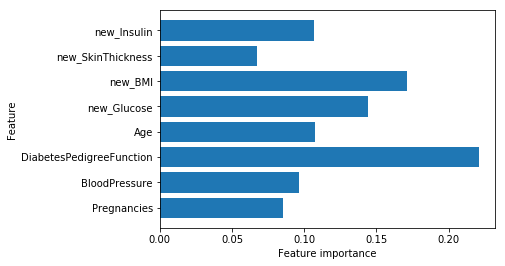

In [217]:
#Looking at the important features

#Rebuild the tree with the best parameters (Learning rate = 0.25, max_depth = 1, n_estimators = 75)

estimator = GradientBoostingClassifier(random_state = 0, learning_rate = 0.25, n_estimators = 75)
estimator.fit(X_train, y_train)

print("Feature importances:\n{}".format(estimator.feature_importances_))

#Defining a function to output features and its importance
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(estimator)


Diabetes Pedigree Function seems to be the most important feature in this model, which is intuitive due to the nature of the feature being an indicator of Diabetes based on family traits.

In [218]:
#Model Evaluation
#Compute Confusion Matrix
y_pred = estimator.predict(X_test)
Confusion = metrics.confusion_matrix(y_test, y_pred)
print("Metrics:\n")
print("Confusion matrix:\n{}".format(Confusion))
#f1score, Recall and Precision
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#Computing ROC/AUC
from sklearn.metrics import roc_auc_score
auc_mod = roc_auc_score(y_test, estimator.predict_proba(X_test)[:,1])
print("AUC score: {:.3f}".format(auc_mod))

Metrics:

Confusion matrix:
[[89 11]
 [20 34]]
             precision    recall  f1-score   support

          0       0.82      0.89      0.85       100
          1       0.76      0.63      0.69        54

avg / total       0.80      0.80      0.79       154

AUC score: 0.843


#####################################################Support Vector Machine#####################################################

In [219]:
#Build a basic SVM Algorithm
from sklearn.svm import *
scaler = StandardScaler()
svm = SVC()

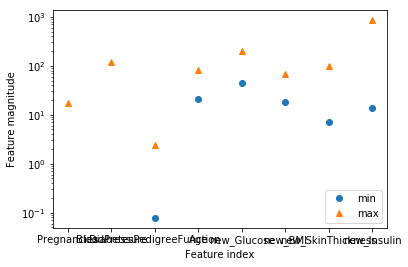

In [220]:
#Preperation before scaling the data
plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), '^', label='max')
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

We can see that the min and max values for each feature are vastly different. Thus, we need to scale the data such that the min/max values of the features are comparable.

In [221]:
#Scaling the data
#Compute min value of training
min_value = X_train.min(axis=0)
#Compute max-min of training
range_value = (X_train-min_value).max(axis=0)
#Computing the scaled data for train and test sets
X_train_scaled = (X_train - min_value)/range_value
X_test_scaled = (X_test - min_value)/range_value
#Sanity Check (on test)
print(color.BOLD+color.UNDERLINE+"Minimum for each feature"+color.END, "\n{}".format(X_train_scaled.min(axis=0)))
print(color.BOLD+color.UNDERLINE+"Maximum for each feature"+color.END, "\n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature 
Pregnancies                 0.0
BloodPressure               0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
new_Glucose                 0.0
new_BMI                     0.0
new_SkinThickness           0.0
new_Insulin                 0.0
dtype: float64
Maximum for each feature 
Pregnancies                 1.0
BloodPressure               1.0
DiabetesPedigreeFunction    1.0
Age                         1.0
new_Glucose                 1.0
new_BMI                     1.0
new_SkinThickness           1.0
new_Insulin                 1.0
dtype: float64


In [222]:
#Fit the model
svm.fit(X_train_scaled, y_train)
#Accuracy Score on training data
print("Accuracy on training set: {}".format(svm.score(X_train_scaled, y_train)))

Accuracy on training set: 0.7768729641693811


In [223]:
print("Accuracy on test set: {}".format(svm.score(X_test_scaled, y_test)))

Accuracy on test set: 0.7727272727272727


We can see that the SVM model has slightly overfitted the model on the training set. To resolve this issue, we must tune the C and Gamma parameters which deal with model overfitting and potentially improve the performance of the model.

In [224]:
#Hyperparameter Tuning
#Set up pipeline
from sklearn.preprocessing import *
scaler = MinMaxScaler()
svm = SVC()
#Pipeline
Pipe = Pipeline([('Transform', scaler), ('Estimator', svm)])
#Define Parameter Grid for parameters of interest (C, Class weight & Penalty)
Param = {'Estimator__C': [90, 100, 110, 120],
            'Estimator__class_weight': [{0:0.4, 1:0.6}, {0:0.35, 1:0.65}, {0:0.3, 1:0.7}],
            'Estimator__gamma': [0.05, 0.1, 0.15, 0.2]}
#Initialise GridSearchCV with 5 CrossValidations
gridsearch = GridSearchCV(Pipe, param_grid = Param, cv = 5)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('Transform', MinMaxScaler(copy=True, feature_range=(0, 1))), ('Estimator', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'Estimator__C': [90, 100, 110, 120], 'Estimator__class_weight': [{0: 0.4, 1: 0.6}, {0: 0.35, 1: 0.65}, {0: 0.3, 1: 0.7}], 'Estimator__gamma': [0.05, 0.1, 0.15, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [225]:
#Best Parameters and Corresponding Score
print("Best parameters: {}".format(gridsearch.best_params_))
print("Best cross-validation accuracy score: {:.4f}".format(gridsearch.best_score_))

Best parameters: {'Estimator__C': 100, 'Estimator__class_weight': {0: 0.4, 1: 0.6}, 'Estimator__gamma': 0.1}
Best cross-validation accuracy score: 0.7785


In [243]:
#Score on test set
print("Accuracy on test set: {}".format(gridsearch.score(X_test, y_test)))

Accuracy on test set: 0.7987012987012987


In [227]:
#Model Evaluation
#Compute Confusion Matrix
y_pred = gridsearch.predict(X_test)
Confusion = metrics.confusion_matrix(y_test, y_pred)
print("Metrics:\n")
print("Confusion matrix:\n{}".format(Confusion))
#f1score, Recall and Precision
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Metrics:

Confusion matrix:
[[82 18]
 [13 41]]
             precision    recall  f1-score   support

          0       0.86      0.82      0.84       100
          1       0.69      0.76      0.73        54

avg / total       0.80      0.80      0.80       154



######################################################Neural Network Model######################################################

In [246]:
#Building a Neural Network
# Write Python Code here:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

#Ensure recomputability
from numpy.random import seed
seed(0)
from tensorflow import set_random_seed
set_random_seed(0)

#Scale Data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

#Create the neural network
ann = Sequential()

#Add input and 1st hidden layer with a dropout of 20% prob
ann.add(Dense(35, activation='relu', kernel_initializer='uniform', input_dim=(8)))
ann.add(Dropout(0.2))
#2nd hidden layer with a dropout of 20% prob
ann.add(Dense(35, activation='relu', kernel_initializer='uniform'))
ann.add(Dropout(0.2))
#Output layer, sigmoid activation function for binary output (since we are dealing with a classification problem here)
ann.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))

#Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train_scaled, y_train, epochs=5, batch_size=100)

Epoch 1/5
614/614 [==============================] - 87s 141ms/step - loss: 0.6925 - acc: 0.6140
Epoch 2/5
614/614 [==============================] - 0s 345us/step - loss: 0.6900 - acc: 0.6515
Epoch 3/5
614/614 [==============================] - 0s 366us/step - loss: 0.6862 - acc: 0.6515
Epoch 4/5
614/614 [==============================] - 0s 360us/step - loss: 0.6800 - acc: 0.6547
Epoch 5/5
614/614 [==============================] - 0s 370us/step - loss: 0.6692 - acc: 0.6726


Number of nodes used was based on a Neural Network design citations link here: http://hagan.okstate.edu/NNDesign.pdf#page=469

In [247]:
#Computing the accuracy of test set
from sklearn.metrics import accuracy_score
y_pred=ann.predict(X_test_scaled)
prediction=[1 if x==True else 0 for [x] in y_pred >= 0.5]
print("Accuracy score: ", accuracy_score(y_test, prediction))

Accuracy score:  0.6753246753246753


To improve the performance of a neural network, we must tune the hyper parameters

In [249]:
#Tuning Hyperparameters
from keras.wrappers.scikit_learn import KerasClassifier

#Create the model for KerasClassifier
def create_model(dropout_rate=0.0):
            ann  = Sequential()
            ann.add(Dense(35, activation='relu', kernel_initializer='uniform', input_dim=(8)))
            ann.add(Dropout(dropout_rate))
            ann.add(Dense(35, activation='relu', kernel_initializer='uniform'))
            ann.add(Dropout(dropout_rate))
            ann.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
            ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            return ann

#Setting up the estimator for gridsearchcv
model = KerasClassifier(build_fn=create_model, verbose=10)

#Defining paramater grid
#We'll tune dropout_rate: epochs and batch size are computationally straining to tune
param_grid = {'dropout_rate': [0.1, 0.15, 0.20]}

#Using CV=5
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv=5)
#Training the model, we use epochs = 5 for computational feasibility
grid_search.fit(X_train_scaled, y_train, epochs=5, batch_size=100)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

#Compute mean accuracy scores for each gridsearched parameter
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Best parameters: {'dropout_rate': 0.1}
Best cross-validation score: 0.6629
0.662866 (0.041442) with: {'dropout_rate': 0.1}
0.653094 (0.027444) with: {'dropout_rate': 0.15}
0.654723 (0.024059) with: {'

In [250]:
#Model Evaluation
# Predicting the Test set results with the best parameters from tuning
prediction = grid_search.predict(np.array(X_test_scaled))
print("Test accuracy score: {:.2f}".format(grid_search.score(X_test_scaled,y_test)))

y_pred=[1 if x == True else 0 for [x] in prediction >= 0.5]

#Accuracy: as shown above!
print("Accuracy score: ",accuracy_score(y_test, y_pred))

#Computing Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

#Precision, Recall and F1 score 
print(classification_report(y_test, y_pred))

Test accuracy score: 0.66
Accuracy score:  0.6623376623376623
Confusion matrix:
[[98  2]
 [50  4]]
             precision    recall  f1-score   support

          0       0.66      0.98      0.79       100
          1       0.67      0.07      0.13        54

avg / total       0.66      0.66      0.56       154



###############################################Model Selection and Conclusion###################################################

Based on the model evaluation metrics, the optimal model in predicting the onset of diabetes is using the tree based Gradient Boosted model. In terms of accuracy, We can see that the highest raw accuracy of the training set was the Support Vector Machines model with a predictive accuracy of 79.8% which is extremely close to 80%. This is followed shortly by Gradient Boosted Trees (79.2%) and Logistic Regression (78.6%). Our Neural Network model performed quite poorly in this iteration and this can be contributed due to time and GPU constraints which hindered the parameter tuning when finding the optimal Neural Network Model. Neural Networks are computationally heavy which factors in to the extra time and power needed to train an optimal model. Potentially if these factors were not a constraint, the Neural Network model may have been the winner but that will remain a hypothesis for now.

In terms of recall and precision, we can see that the models are generally close, with the recall of the Gradient Boosted Trees leading at 80% and the other models falling close by (Logistic Regression and SVM). This shows that Gradient Boosted Trees was the best at detecting more of the positive cases in the sample when the information was fed through the algorithm. The precision score was the biggest differentiation between the models as we see Gradient Boosted Trees maintaing a high score of 80% for Precision and the other models obtaining a comparatively much lower score (60%-70%). This shows that the Gradient Boosted Trees was able to not only predict correctly most of the Diabete cases in the dataset but was able to do so with having an increase in False Positives. Although the other models had a comparatively close Recall score, those models were only able to do so by predicting a large amount of individuals as positive despite them being negative (not having diabetes). This advantage is also also strongly reflected in the f1-score, where Gradient Boosted Trees lead with a score of 79% (performed quite well in Precision and Recall).

In conclusion, the model that will be deployed will be the tree-based Gradient Boosted model as the model was not only able to maintain a relatively high accuracy but it could predict a majority of the individuals correctly without an overbearing number of False Positives. The most important metric in this case would be "Recall" as it must be able to predict as many of the individuals that are positive to ensure the risk of an untreated patient isn't too high (false positives are better than false negatives). Although a majority of the models were close in this area, the final decision was based on the f1-score which took into account the precision score as well and in this case the Gradient Boosted Model outperformed the others. 